### Imports

In [1]:
%pip install -r requirements.txt --quiet

from agents.fact_checker_agent import FactCheckerAgent
from network.socialnetwork import SocialNetworkEnv
from agents.news_agent import NewsAgent

Note: you may need to restart the kernel to use updated packages.


### Setup

In [2]:

# --- Scenario 1 : 1 fake, 1 real agent, 1 fact checker, 4 consumer network ---- #
network = SocialNetworkEnv(numConsumer=50)

fAgent = NewsAgent("fake-information", env=network, trustLevel=0)
rAgent = NewsAgent("real-information", env=network, trustLevel=0)
# rAgent2 = NewsAgent("real-information", env=network, trustLevel=0)
# rAgent3 = NewsAgent("real-information", env=network, trustLevel=0)
fcAgent = FactCheckerAgent("fact-checker", env=network, trustLevel=0.0)

network.add_news_agents_to_network(agentType=fAgent)
network.add_news_agents_to_network(agentType=rAgent)
# network.add_news_agents_to_network(agentType=rAgent2)
# network.add_news_agents_to_network(agentType=rAgent3)
network.add_fact_checker_to_network(agentType=fcAgent)

### Training


--------- epoch 0 ---------------------
Trust Levels:

Fake Agent: 
reward: 18, penalty : 16, influenced : {0, 33, 35, 4, 37, 38, 9, 10, 41, 13, 14, 15, 19, 20, 22, 25, 26, 30}, qval : 0.0

Real Agent: 
reward: 18, penalty : 18, influenced : {0, 3, 4, 36, 38, 9, 41, 11, 15, 48, 49, 19, 23, 24, 27, 28, 30, 31}, qval : 0.0

consumer info before fact checker is in network
Consumer Node Info:

Node 0 - Trust Level: 0.00, Interactions: 2

Node 1 - Trust Level: -0.10, Interactions: 0

Node 2 - Trust Level: 0.00, Interactions: 0

Node 3 - Trust Level: -0.20, Interactions: 1

Node 4 - Trust Level: 0.00, Interactions: 2

Node 5 - Trust Level: 0.00, Interactions: 0

Node 6 - Trust Level: 0.00, Interactions: 0

Node 7 - Trust Level: 0.10, Interactions: 0

Node 8 - Trust Level: 0.00, Interactions: 0

Node 9 - Trust Level: 0.00, Interactions: 2

Node 10 - Trust Level: 0.20, Interactions: 1

Node 11 - Trust Level: -0.20, Interactions: 1

Node 12 - Trust Level: 0.00, Interactions: 0

Node 13 - Trust

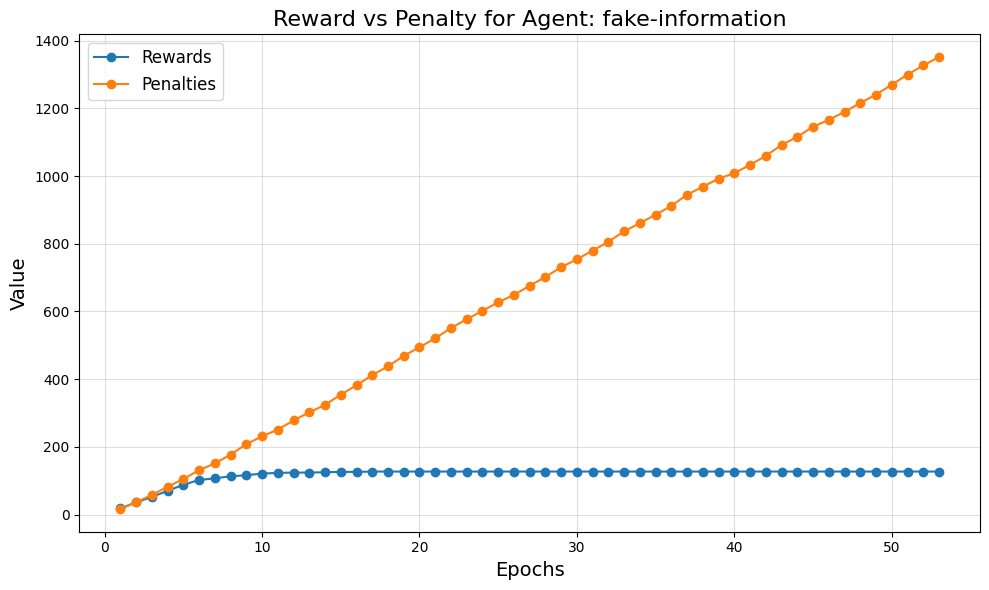

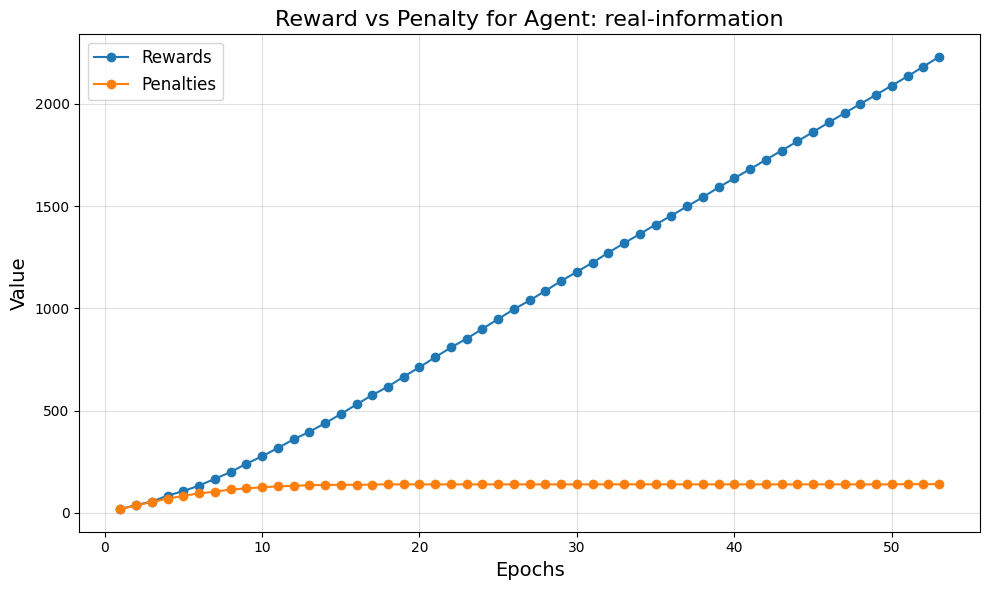

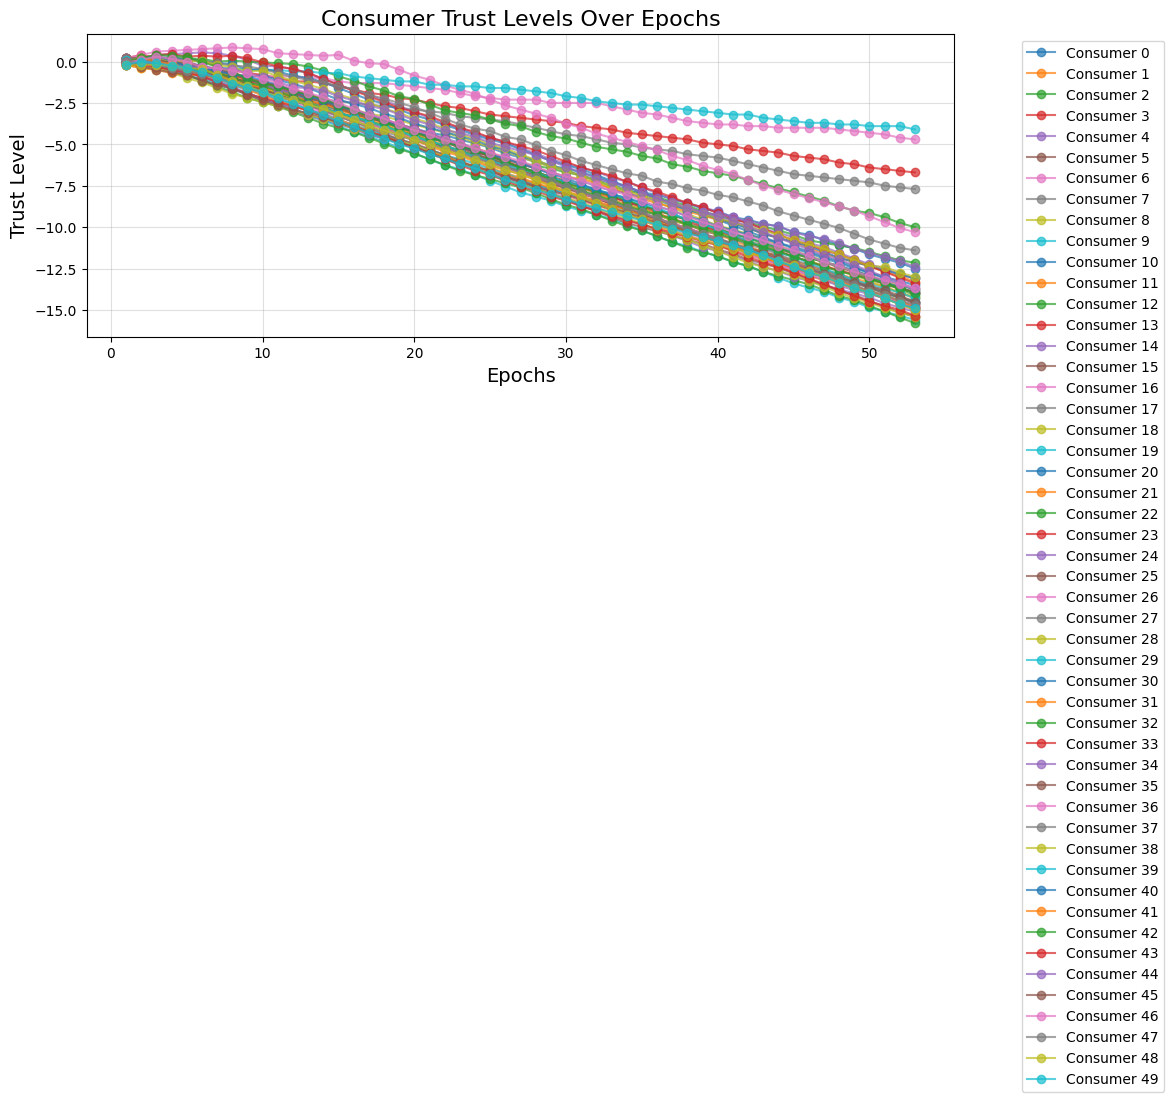

In [3]:
fake_agent_rewards = []
fake_agent_penalties = []

real_agent_rewards = []
real_agent_penalties = []

fchecker_agent_rewards = []
fchecker_agent_penalties = []

trust_levels_history = {node: [] for node, data in network.graph.nodes(data=True) if data["agentType"] == "consumer"}


for i in range(network.network_size):
    print(f"\n--------- epoch {i} ---------------------")

    fAgent_action = network.draw_sample_from_action_space()
    rAgent_action = network.draw_sample_from_action_space()
    # rAgent_action2 = network.draw_sample_from_action_space()
    # rAgent_action3 = network.draw_sample_from_action_space()
    fcAgent_action = network.draw_sample_from_action_space()

    # network.render()

    print("Trust Levels:")

    print("\nFake Agent: ", end="")
    reward, penalty, influenced, qVal = network.step(fAgent_action, fAgent)
    fake_agent_rewards.append(reward)
    fake_agent_penalties.append(penalty)

    print(f"\nreward: {reward}, penalty : {penalty}, influenced : {influenced}, qval : {qVal}")


    print("\nReal Agent: ", end="")
    reward2, penalty2, influenced2, qval2 = network.step(rAgent_action, rAgent)
    real_agent_rewards.append(reward2)
    real_agent_penalties.append(penalty2)

    print(f"\nreward: {reward2}, penalty : {penalty2}, influenced : {influenced2}, qval : {qval2}")


    # print("\nReal Agent 2: ", end="")
    # reward3, penalty3, influenced3, qval3 = network.step(rAgent_action2, rAgent2)
    # print(f"\nreward: {reward3}, penalty : {penalty3}, influenced : {influenced3}, qval : {qval3}")
    
    # print("\nReal Agent 3: ", end="")
    # reward4, penalty4, influenced4, qval4 = network.step(rAgent_action3, rAgent3)
    # print(f"\nreward: {reward4}, penalty : {penalty4}, influenced : {influenced4}, qval : {qval4}")

    print("\nconsumer info before fact checker is in network")
    network.print_consumer_info()


    print("\nFact Checker Agent: ", end="")
    network.step_fact_checker(fcAgent, threshold=0.7)

    print(f"\nreward: {fcAgent.reward} penalty: {fcAgent.penalty}")

    
    for node, data in network.graph.nodes(data=True):
        if data["agentType"] == "consumer":
            trust_levels_history[node].append(data["trustLevel"])

    


    print("consumer info after fact checker in network")
    network.print_consumer_info()

network.visualize_rewards_penalties(fAgent, fake_agent_rewards, fake_agent_penalties)
network.visualize_rewards_penalties(rAgent, real_agent_rewards, real_agent_penalties)
network.visualize_consumer_trust_levels(trust_levels_history)



